<h1 align="center">Подготовка</h1>

Ставим таймер автосохранения тетрадки.

In [1]:
%autosave 30

Autosaving every 30 seconds


Импортируем библиотеку в целях скачивания материалов в папку проекта.

<hr align="center" width="80%" size="3" color="#0000dd" />

<h1 align="center">Анализ сервиса мобильного приложения «UT»</h1>
<hr align="center" width="80%" size="3" color="#0000dd" />
<h3 >Описание проекта</h3>

В мобильном приложении «UT» пользователи продают вещи, путем размещения лотов на доске объявлений. Требуется провести анализ поведения пользователей в целях выделения основных сценариев использования приложения.


<h3>Цель исследования</h3>

Повышение монетизации путем увелечения пользовательской вовлеченности.

<h3>Основные вопросы исследования</h3>

- Пользователи какой группы склонные чаще возвращаться в мобильное приложение (Retention rate)?

- Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

- Как различается время между распространенными событиями пользователей в разрере выделенных групп?

<h3>Выдвинутые гипотизы</h3>

- В целях оценки эффективности рекламных кампаний проверить конверсию в просмотры контактов пользователей пришедших из источников `google` и `yandex`;
- В целях повышения монетизации сравнить конверсию в просмотры контактов пользователей, которые совершают действия `tips_show` и `tips_click`, и тех, что совершают только действие `tips_show`.


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='back'><a/> 
<h1>Содержание:</h1>

[Описание данных](#step0)

[Материалы](#step00)

1. [Загрузка данных, их обзор и подготовка к анализу](#step1)

2. [Изучение и проверка данных:](#step2)
    * [Количество событий в логе](#step21)
    * [Количество пользователей](#step22)
    * [Среднее количество событий на одного пользователя](#step23)
    * [Частота событий](#step25)
    * [График активности пользователей](#step24)
    * [Пользовательские сессии](#step26)
    * [Время в приложении](#step27)
    * [Конверсия в целевое действие(contacts_show)](#step28)
    * [Пользовательские профили](#step29)
    * [Число уникальных пользователей в день](#step291)
    * [Коэффициент удержания клиентов](#step292)

3. [Анализ влияния событий на совершение целевого события](#step3)  
    * ["События-компаньоны"](#step31)
    * [Воронка событий](#step32)
    
4. [Сегментация пользователей](#step4)  
    * [Определение метрик для сегментации](#step43)
    * [Матрица корреляции выбранных метрик для сегментации](#step44)
    * [Сегментация и первые выводы](#step45)
    
5. [Ответы на запрос заказчика:](#step5)
    * [Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?](#step51)
    * [Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?](#step52)
    * [Как различается время между распространенными событиями пользователей из разных групп?](#step53)
    
6. [Проверка гипотиз](#step6)  
    * [Конверсия в просмотры контактов пользователей пришедших из источников google и yandex](#step61)
    * [Конверсия в просмотры контактов пользователей, которые совершают действия tips_show и tips_click, и тех, что совершают только действие tips_show](#step62)
    
7. [Общие выводы и рекомендации](#step7) 
******

<a id='step0'><a/> 
## Описание данных
[Назад к оглавлению](#back)

Содержание `mobile_dataset.csv`:
- `event.time` — время совершения события;
- `event.name` — наименование совершенного события;
- `user.id` — идентификатор пользователя.

Содержание `mobile_sources.csv`:

- `userId` — идентификатор пользователя;
- `source` — источник трафика.

Расшифровка событий:

- `advert_open` — открытие карточки объявления;
- `contacts_call` — пользователь совершил звонок через приложение;
- `contacts_show` — пользователь просмотрел контакты в объявлении;
- `favorites_add` — пользователь добавил объявление в "избранное";
- `map` — пользователь открыл карту;
- `photos_show` — пользователь просмотрел фотографии в объявлении;
- `search_NN` — пользователь воспользовался поиском в приложении (`NN` - индификатор поискового запроса);
- `show_contacts` — пользователь просмотрел контакты в объявлении;
- `tips_click` — пользователь осуществил переход по рекомендованному объявлению;
- `tips_show` — пользователь увидел рекомендованные объявления.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step00'><a/> 
## Материалы
[Назад к оглавлению](#back)

<a href="https://public.tableau.com/views/mob_app_unnecessary_things/Dashboard1?:language=en-US&:display_count=n&:origin=viz_share_link
">Дашборд</a>

<a href="https://docs.google.com/presentation/d/1WMbBAq-2XBVEAFW55cg0Ie5uv1y4CXoZW48hhMHi8IY/edit?usp=sharing
">Презентация</a>


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step1'><a/> 
## Загрузка данных, их обзор и подготовка к анализу
[Назад к оглавлению](#back)

Импортируем требумые для анализа библиотеки методом `import`.

In [2]:
import os

import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

import math as mth
import scipy.stats as stats
from statsmodels.stats.proportion import proportions_ztest

Определим функцию, которая будет устранять проблемы с загрузкой данных.

In [3]:
def read_file(file_name): 
    path1 = os.path.join('/datasets', file_name) 
    path2 = os.path.join(file_name)
    if os.path.exists(path1): 
        df = pd.read_csv(path1) 
        return df
    elif os.path.exists(path2): 
        df = pd.read_csv(path2) 
        return df
    else:
        print('File is not found')

Определим функцию для первичного знакомства с данными, где также проверим данные на явные дубликаты и пропуски.

In [4]:
def first_view(df):
    print('\033[1m' + 'Информация, включающая записи датасета:' + '\033[0m')
# выведем 10 любых строк    
    print(df.sample(10)) 
    print('\033[1m' + 'Информация о датасете:' + '\033[0m\n')
# получим общую информацию о датасете
    df.info()
# проверка на явные дубликаты
    print('\033[1m' + '\nДубликатов в таблице:' + '\033[0m', df.duplicated().sum())
#проверка на пропуски
    print('\033[1m' + '\nПодсчет пропусков:' + '\033[0m\n', df.isna().sum())
#обзор числовых и строковых значений
    print('\033[1m' + '\nОписательная статистика:' + '\033[0m\n', df.describe(include='all')) 

<h3>Загрузка данных</h3>

Применим заданную ранее функцию для загрузки данных.

In [5]:
sources = read_file('mobile_soures.csv')
dataset = read_file('mobile_dataset.csv')

<h3>Обзор данных</h3>

Вызовем определенную ранее функцию для первичного ознакомления с данными.

In [6]:
first_view(sources)

Информация, включающая записи датасета:
                                    userId  source
1376  8c80d63c-6b79-4fb5-b89c-2c72d614323d   other
2017  5dabae44-970a-4d21-a7d8-8e7ba5639973   other
144   dba7b47e-62f4-475e-9f5e-d842af7225da   other
814   28d03e3b-15af-467e-b492-930231df1f37  yandex
3071  2e6bc4e2-b4a4-46c2-bb3f-4e243c17d6ad  google
2785  3ad631f1-42c9-4b4b-9d27-254a77b96ac0  yandex
2219  69c148e9-5e51-4e2b-a752-6ee361fa26f2   other
88    11e5d8e7-e6fe-43ed-8bff-fd5deb99ffdb  yandex
3821  613952ec-0f28-43b7-9891-832ec458b57c  google
2754  16855b4e-eefc-468c-93cb-7832f431dcd2  yandex
Информация о датасете:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4293 entries, 0 to 4292
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   userId  4293 non-null   object
 1   source  4293 non-null   object
dtypes: object(2)
memory usage: 67.2+ KB

Дубликатов в таблице: 0

Подсчет пропусков:
 userId    0
source    0
dtype: int64



**Выводы по датасету `sources`:**
- состоит из 2 столбцов и 4 293 строк;
- явные дубликаты отсуствуют;
- пропуски в данных отсуствуют;
- имеется 4 293 уникальных индификатора пользователя;
- имеется 3 уникальных источника трафика, при этом наиболее частый - *yandex* (встречается 1934 раза)

Требуется следующая предобработка:
- приведение написания заголовков столбцов к единому стилю (преобразования текста в стиль snake_case);
- в целях уменьшения используемой памяти возможно изменение типа данных столбца источники на категориальный. 

In [7]:
first_view(dataset)

Информация, включающая записи датасета:
                       event.time     event.name  \
63274  2019-10-30 19:37:24.181117      tips_show   
37965  2019-10-22 13:16:23.236979      tips_show   
16048  2019-10-14 08:37:57.985155      tips_show   
19146  2019-10-15 09:20:41.743079  contacts_show   
66485  2019-10-31 21:17:27.685972  contacts_call   
5923   2019-10-09 13:46:37.496487      tips_show   
39550  2019-10-22 22:03:21.464560  contacts_show   
46810  2019-10-25 11:53:32.748794       search_4   
25102  2019-10-17 12:00:37.516603    photos_show   
33657  2019-10-20 20:27:53.353306      tips_show   

                                    user.id  
63274  aed9d717-9562-4ac9-8629-d7ef7fd7029e  
37965  1191ffd1-cc6f-4db4-94d1-d8c8168aeb63  
16048  69d9235d-7849-4df1-be59-364af19fb43b  
19146  a6ccc0cb-fdf6-4c97-b713-3d8a4e88bd41  
66485  ac442fb7-b464-4625-b31c-d86600a3aa5f  
5923   5f90d7d1-e029-4b99-b683-2d5d4d048f6b  
39550  e549f8ef-653b-4c5c-a6bd-8970e6bd860b  
46810  146c6d31-d31

**Выводы по датасету `dataset`:**
- состоит из 3 столбцов и 74 197 строк;
- явные дубликаты отсуствуют;
- пропуски в данных отсуствуют;
- имеется 16 уникальных событий, наиболее частое — `tips_show` (40 055 событий).
- имеется 4 293 уникальных индификатора пользователя, что соответсвует данный из датасета `sources`;

Требуется следующая предобработка:
- приведение написания заголовков столбцов к единому стилю (преобразования текста в стиль snake_case);
- преобразования типа данных для столбца, содержащего сведения о моменте события;
- более детальный обзор значений в столбце событий в целях иселючения избыточной информации для нашего анализа;
- в целях уменьшения используемой памяти возможно изменение типа данных столбца с событиями на категориальный. 

<h3>Подготовка данных к анализу</h3>

<h4>Преобразования текста в стиль <i>snake_case</i>.</h4>

Функцией `columns`, примененной к датасету, вызовем текущие наименования столбцов.

In [8]:
print(sources.columns)
dataset.columns

Index(['userId', 'source'], dtype='object')


Index(['event.time', 'event.name', 'user.id'], dtype='object')

Как видим:
- для `sources` целесообразно будет применить функцию `rename` с аргументом `columns`, куда мы передадим актальное наименование стоблбца и желаемое;
- для `dataset` применим функцию `replace` заменив точки на нижнее подчеркивание.

In [9]:
sources = sources.rename(columns={'userId': 'user_id', 'source': 'source'}, errors="raise")
dataset.columns = [x.replace('.', '_') for x in dataset.columns]

<h4>Преобразование типов данных</h4>

Начнём преобразование с даты и времени. 

Вызовем любое значение столбца `event_time` применив к датафрейму функцию `sample`.

In [10]:
dataset['event_time'].sample()

59054    2019-10-29 12:50:16.899412
Name: event_time, dtype: object

Как видим информация о моменте события храниться с долей до микросекунды.

Согласно исследованиям, среднее значение CPS(click per second) составляет 6.51 клика в секунду, по словам представителей Google мировой рекорд составляет 14.1. При чём это касается использования специальных манипуляторов, так как мышь например.

В свою очередь, принимая во внимание, что в исследовании речь идёт о мобильном приложении, где следуя актуальным тенденциям, взаимодействие с интерфейсом построено на действиях, совершаемых в один клик (т.к. это не игра или прочее специализированое ПО, где CPS может оказывать значение), округлим временной момент события с точностью до 1 секунды.

На основании вышеиложенного, сначала применим функцию `to_datetime` изменим тип данных рассматриваемого столбца, а позже применим функцию `dt.round` с переданным аргументом `S` для округления до секунд.

In [11]:
dataset['event_time'] = pd.to_datetime(dataset['event_time'], format='%Y-%m-%d %H:%M:%S')
dataset['event_time'] = dataset['event_time'].dt.round('S')

Как мы помним, ранее, при первичном анализе, у нас не возникало явных дубликатов на сырых данных, однако, применим округление к столбу, хранящем сведения о моменте события, они могли возникнуть.

Проверим данную теорию, применим последовательно функции `duplicated` и `sum`.

In [12]:
dataset.duplicated().sum()

1118

Как видим, у нас появилось 1 118 дубликатов. Взгляним на них детальнее. Выведем 4 первые и последние строки появившихся дубликатов.

In [13]:
display(dataset.loc[dataset.duplicated(keep=False)].head(4))
dataset.loc[dataset.duplicated(keep=False)].tail(4)

,event_time,event_name,user_id
395,2019-10-07 11:00:20,tips_show,fb667205-a708-4693-832d-363a30022cfc
396,2019-10-07 11:00:20,tips_show,fb667205-a708-4693-832d-363a30022cfc
421,2019-10-07 11:10:40,map,ed13f6f0-08f4-4561-852e-456580f7a40d
422,2019-10-07 11:10:40,map,ed13f6f0-08f4-4561-852e-456580f7a40d


,event_time,event_name,user_id
73838,2019-11-03 21:45:22,photos_show,1af9ffcd-2c77-4de0-9d35-3ff30604c9bd
73839,2019-11-03 21:45:22,photos_show,1af9ffcd-2c77-4de0-9d35-3ff30604c9bd
74027,2019-11-03 22:41:01,tips_show,16a5371c-152f-48d8-86fe-5636a931316b
74028,2019-11-03 22:41:01,tips_show,16a5371c-152f-48d8-86fe-5636a931316b


Скорее всего наличие дубликатов такого рода свидетельствует либо о технических проблемах с логированием событий, либо с совершением пользователем ошибочного второго нажатия.

Учитывая, что их количество невелико отностильно имееющегося массива данных ~ 1,4 % (1 118 к 79 197), принимаем решение избавиться от дублей функцией `drop_duplicates`.

In [14]:
dataset = dataset.drop_duplicates()

Для преобразования типа в категориальные типы данных изучим дополнительно предлагаемые к преобразованию данные.

Начнём со датасета `sources`:
Для начала выведим на экран уникальные значения столбца `source` методом `unique`.

In [15]:
sources['source'].unique()

array(['other', 'yandex', 'google'], dtype=object)

Принимаемые значения соответвуют ТЗ, а также могут быть преобразованые в категориальный тип данных.

In [16]:
sources['source'] = sources['source'].astype('category')

Теперь перейдем в датасету `dataset`.

Изучим уникальные значения столбца `event_name`.

In [17]:
dataset['event_name'].unique()

array(['advert_open', 'tips_show', 'map', 'contacts_show', 'search_4',
       'search_5', 'tips_click', 'photos_show', 'search_1', 'search_2',
       'search_3', 'favorites_add', 'contacts_call', 'search_6',
       'search_7', 'show_contacts'], dtype=object)

Изучим детальные частоту совершения событий применив функцию `value_counts`.

In [18]:
dataset['event_name'].value_counts()

tips_show        39892
photos_show       9372
advert_open       6145
contacts_show     4302
map               3760
search_1          3489
favorites_add     1414
search_5          1049
tips_click         811
search_4           701
contacts_call      538
search_3           521
search_6           460
search_2           324
search_7           222
show_contacts       79
Name: event_name, dtype: int64

Исходя из того, что в рамках данного исследования не имеет значения ни количетсво совершаемых поисковых запросов пользователем, ни порядковый номер этого запроса, мы можем совершенно спокойно объединить все действия, связанные с поиском, в одно событие - `search`.

Также объединим события `contacts_show` и `show_contacts`), принципиальной разницы в их сути нам доведено не было в ТЗ, поэтому прдполгаем, что `show_contacts` есть более ранее название `contacts_show` для одного и того же события "просмотр контактов", которое ошибочно закралось в лог. В связи с чем для описания такого типа события будем использовать то, которое произошло наибольшее количество раз - `contacts_show`(4 302) вместо `show_contacts`, которое произошло всего 79 раз.

In [19]:
# объединяем события, связанные с поиском
dataset.loc[dataset['event_name'].str.contains('search'), 'event_name'] = 'search'

# заменяем события show_contacts на contacts_show
dataset.loc[dataset['event_name'] == 'show_contacts', 'event_name'] = 'contacts_show'

Теперь, когда мы объединили(заменили) одинкавые по смыслу события, можем преобразовать тип данных в категориальный уже знакомым нам методом.

In [20]:
dataset['event_name'] = dataset['event_name'].astype('category')

<h4>Проверка соответствия пользователей в таблицах</h4>

В целях проверки наличия возможности бесшовного соединения данных из двух датасетов в один, проверим соотвествие пользователей в обоих списках, как признак по которому предполагается объединение.

Для проверки равентсва пользователей в обоих таблицах применим функцию `equals`. 
В свою очередь, учитывая, что она применяется для сравнения двух Series или DataFrame, создадим из списка уникальных пользователей, полученых функцией `unique`, Series функцией `series`.

На выходе `equals` вернёт True, если значения в сравнимаемых объектах равны, и False, если, соотвественно, нет.

In [21]:
pd.Series(sources['user_id'].unique()).equals(pd.Series(dataset['user_id'].unique()))

True

Как видим пользователи в изучаемых датафреймах совпадают.

<h4>Создание единого датафрейма для анализа</h4>

Применив функцию `merge` объединим два датафрейма в одну переменную, которую будем использовать в дальнейшем, а также выведем на экран любые 5 строк нового датафрейма.

In [22]:
df = dataset.merge(sources, on='user_id', how='left')
df.sample(5)

,event_time,event_name,user_id,source
25797,2019-10-17 19:22:31,tips_show,b185d7d1-6610-4b4f-9d6a-06afb76a398b,google
71547,2019-11-03 16:01:50,tips_show,61c7b41d-9d33-48c3-b9b9-da54f2644bd0,other
32185,2019-10-20 13:16:57,advert_open,3521521c-99cb-4142-96cb-0b97cd5c60e6,yandex
55984,2019-10-28 17:27:23,tips_show,081bb564-703e-4f1c-9016-ac9460dec5bf,other
38910,2019-10-22 21:46:03,photos_show,f6f94ebe-e69a-4ae3-9fb0-312d52d35826,other


<h2>Выводы</h2>

Первичный взгляд на полученные для анализа данные выявил ряд моментов, которые были в дальнейшем устранены, в частности:
- преобразования заголовков столбцов к одиному стилю (snake_case), что в дальнейшем повысит уровень читаемости и комфорта в работе,
- преобразование типов данных, которые в конечном счёте теперь соответствуют реальности, а на больших объёмах данных позволят провести экономию занимаемого места (перевод в категориальный тип);
- при преобразовании типов данных было выявлено и успешно устранено:
    - удалены 1,4% дубликатов, возникших при округлении даты до 1 секунды,
    - объединены равнозначные события по идентичным категориям;
- проведена проверка соответсвия пользователей в обоих источников данных в дальнейшего создания единого датафрейма для анализа, который был успешно сформирован.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step2'><a/> 
## Изучение и проверка данных
[Назад к оглавлению](#back)

В рамках данного раздела изучим события и пользователей в логах, выявим период наблюдения. Выделим и изучим пользовательские сессии.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step21'><a/> 
### Количество событий в логе
[Назад к оглавлению](#back)

Функцией `shape` с с переданным аргументом 0 выведем на экран количество строк в датафрейме, которые и будут равны количеству проишедших событий.

In [23]:
print('Всего событий %d.' % (df.shape[0]))

Всего событий 73079.


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step22'><a/> 
### Количество пользователей
[Назад к оглавлению](#back)

Применим функцию `nunique`, чтобы вывести количество уникальных пользователей.

In [24]:
print('Всего пользователей %d.' % (df['user_id'].nunique()))

Всего пользователей 4293.


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step23'><a/> 
### Среднее количество событий на одного пользователя
[Назад к оглавлению](#back)

Для расчёта среднего количества событий на одного пользователя сгруппируюм методом `groupby` датафрейм по столбцу `user_id` с применением аггрегирующей функции подсчёта, `count`, к столбцу с событиями, `event_name`, в последущем применив метод `describe` для вывода основных статистических характеристик.

In [25]:
df.groupby('user_id').agg({'event_name': 'count'}).describe().T

,count,mean,std,min,25%,50%,75%,max
event_name,4293.0,17.022828,28.617646,1.0,5.0,9.0,17.0,472.0


Как мы можем видеть, в среднем на одного уникального пользователя приходится порядка 17 событий, медианное значение составляет 9 событий. 

На среднее значение сильно влияют выбросы (пользователи, с очень большим числом событий).

<a id='step25'><a/> 
### Частота событий
[Назад к оглавлению](#back)

В начале изучим частоту событий.

In [26]:
#поместим в переменную события и их частоту
events_count_n_ratio = df['event_name'].value_counts().reset_index()
#переименуем столбцы сообтветсвующим образом
events_count_n_ratio.columns = ['event_name', 'event_count']
#посчитаем соотнощение события к общему
events_count_n_ratio['event_ratio'] = events_count_n_ratio['event_count'] / len(df)
events_count_n_ratio

,event_name,event_count,event_ratio
0,tips_show,39892,0.545875
1,photos_show,9372,0.128245
2,search,6766,0.092585
3,advert_open,6145,0.084087
4,contacts_show,4381,0.059949
5,map,3760,0.051451
6,favorites_add,1414,0.019349
7,tips_click,811,0.011098
8,contacts_call,538,0.007362


Далее узнаем cколько пользователей приходится на каждое действие, следуя ранее используемой логике.

In [27]:
users_count_n_ratio = df.groupby('event_name')['user_id'].nunique().sort_values(ascending=False).reset_index()
users_count_n_ratio.columns = ['event_name', 'users_count']
users_count_n_ratio['users_ratio'] = users_count_n_ratio['users_count'] / df['user_id'].nunique()
users_count_n_ratio

,event_name,users_count,users_ratio
0,tips_show,2801,0.652457
1,search,1666,0.388074
2,map,1456,0.339157
3,photos_show,1095,0.255066
4,contacts_show,981,0.228512
5,advert_open,751,0.174936
6,favorites_add,351,0.081761
7,tips_click,322,0.075006
8,contacts_call,213,0.049616


Самое распространенное действие среди пользователей - просмотр рекомендованных объявлений - более 54% от всех событий. Рекомендованные объявления просматривает 65% пользователей. Остальные действия совершают менее половины всех пользователей: на втором месте - действия по поиску (38% пользователей), на третьем - открытие карты объявлений (33% пользователей).

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step24'><a/> 
### График активности пользователей
[Назад к оглавлению](#back)

Выясним за какой период предоставлены данные, а также оценим их полноту.

Для определения максимальной и минимальной даты воспользуемся функциями `max` и `min` примеменными к столбцу `event_time`, хранищим информацию о дате события, а чтобы установить период за который мы имеем данный наёдм разницу между двумя этими датами.

In [28]:
print('Данные c %s по %s, период составляет %s дней.' % (df['event_time'].min(), df['event_time'].max(), np.ceil((df['event_time'].max()-df['event_time'].min())/np.timedelta64(1, 'D'))))

Данные c 2019-10-07 00:00:00 по 2019-11-03 23:58:13, период составляет 28.0 дней.


Изучим полноту данных построив гистограмму при помощи библиотеки `seaborn`.

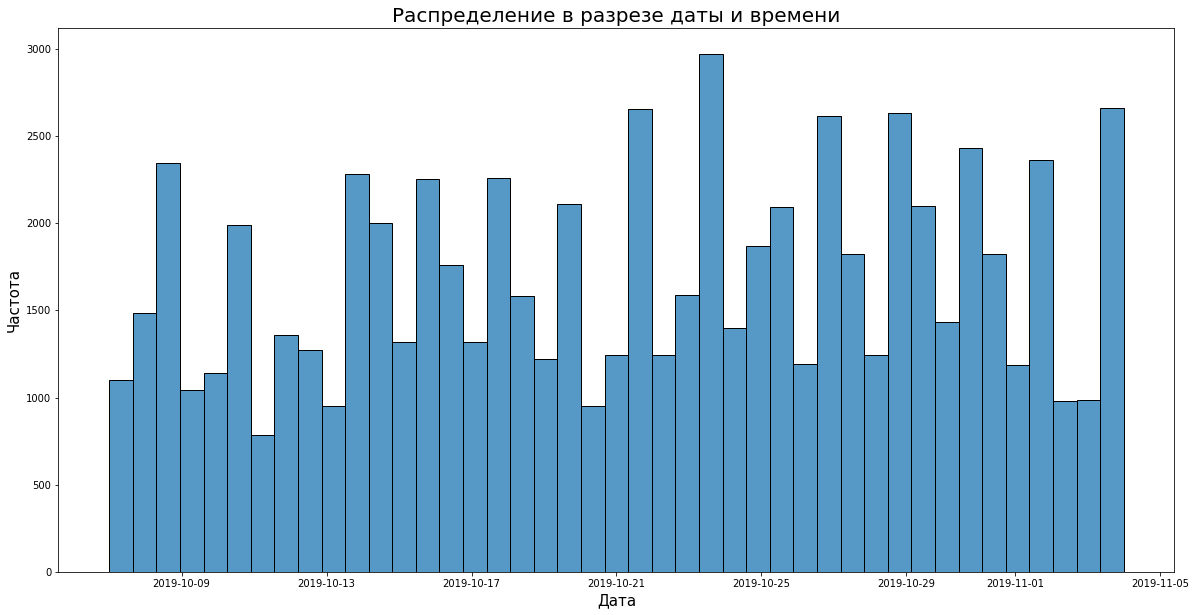

In [29]:
f, ax = plt.subplots(figsize=(20, 10))
sns.histplot(df,x="event_time")
plt.title('Распределение в разрезе даты и времени', size=20)
plt.ylabel("Частота", size=15)
plt.xlabel("Дата", size=15)
plt.show()

Исходя из полученной гистограммы можно сделать вывод о том, что данные распределены равномерно.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step26'><a/> 
### Пользовательские сессии
[Назад к оглавлению](#back)

В целях выделения пользовательских сессий расчитаем разницу между моментами времени каждого события в разрезе пользователей, применим функцию `diff`, результат действий положим в новую переменную.

Функцией `describe` отобразим числовое описание времени между событиями.

In [30]:
events_diff = df.groupby('user_id')['event_time'].diff()

events_diff.describe()

count                        68786
mean     0 days 03:56:48.409487395
std      1 days 01:45:04.312930597
min                0 days 00:00:00
25%                0 days 00:00:26
50%                0 days 00:01:12
75%                0 days 00:03:04
max               26 days 13:49:55
Name: event_time, dtype: object

Как видим время между событиями принимает значения в диапазоне от прометка менее секунды до практически 27 дней, при этом стандартное отклонение составляет 1 день 1 час 45 минут и 4 секунды, а 75% значений укладывается в 3 минуты 4 секунды.

Это нормальная пользовательская активность для такого рода приложения: пользователь зашёл, совершил ряд действий, а далее отложил приложение до возникновения следующей потребности.

Визуализируем полученные данные, сократив рассматриваемый диапазон до 30 минут (1 800 секунд).

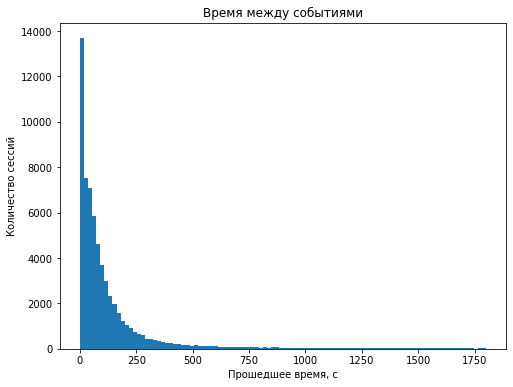

In [31]:
events_diff.dt.seconds.plot( # применяем dt.seconds для преобразования данных в секунды
    kind='hist',
    bins=100,
    range=(0, 1800),
    figsize=(8, 6),
    legend=False
)

plt.title('Время между событиями')
plt.xlabel('Прошедшее время, с')
plt.ylabel('Количество сессий')
plt.show()

Исходя из гистограммы можно сделать вывод, что основная часть сессий укладывается в 750 секунд. Данное значение выберем в качестве точки таймаута, после которой наступает новая пользовательская сессия.

В целях индетификации пользовательских сессий отсортируем основной датафрейм в разрезе пользователей и момента события. 

Номер сессии присвои методом `cumsum`.

Также отобразим количество выделенных сессий применив функцию `nunique` к новому столбца.

In [32]:
df = df.sort_values(by=['user_id', 'event_time'])
# создаём фильтр по user_id
user_filter = df['user_id'] != df['user_id'].shift()
# создаём фильтр по event_time с учётом сессии в 750 сек
timeout = df['event_time'].diff() > pd.Timedelta('750sec') 

# формируем столбец с сессиями
df['session_id'] = (user_filter | timeout).cumsum()


print('Выделено пользовательских сессий:', df['session_id'].nunique())

Выделено пользовательских сессий: 12006


Посчитаем сколько приходится сессий на одного пользователя.

Для этого применим функцию `describe` к датафрейму сгруппированому в разрезе пользователей с применением аггрегирующей функции `nunique` к столбцу `session_id`.

In [33]:
df.groupby('user_id').agg({'session_id': 'nunique'}).describe().T

,count,mean,std,min,25%,50%,75%,max
session_id,4293.0,2.796646,4.419506,1.0,1.0,2.0,3.0,120.0


Среднее число сессий на пользователя: 2.7

Медианное число сессий на пользователя: 2.0

Также построим гистограмму, ограничив ототбражаемые границы значений количества сессий зоной без выбросов, т.е. от 1 до сумму третьего квартиля и межквартального размаха умноженного на 1,5, при этом межквартальный размах считаем как разницу между третьи и первым квартилем. Данные о значениях квартилей возмём из расчёта выше.

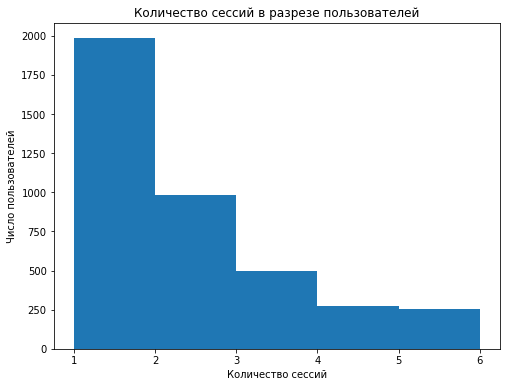

In [34]:
df.groupby('user_id').agg({'session_id': 'nunique'}).plot(
    kind='hist',
    bins=5,
    range=(1, (3 + 1.5 * (3-1))), 
    figsize=(8, 6),
    legend=False
)
plt.title('Количество сессий в разрезе пользователей')
plt.xlabel('Количество сессий')
plt.ylabel('Число пользователей')
plt.show()

В среднем на одного пользователя приходится 2,7 сессий, при этом медианное значение — 2 сессии на пользователя, которое меньше среднего за счёт длинного хвоста редких, но очень высоких значений. 

Судя по гистограмме, большинство пользователей действительно имели по 1 сессии и больше в приложение не возвращались.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step27'><a/> 
### Время в приложении
[Назад к оглавлению](#back)

Для определения времении проведенном в приложении создадим временную переменную в которой произведем требуемые вычисления, а позже добавим полученные сведения в основной датафрейм.

In [35]:
#расчитаем начало и конец сессии
sessions_time = pd.pivot_table(df, index='session_id', values='event_time', aggfunc=['min','max'])
#расчитаем время сессии
sessions_time['session_time'] = (sessions_time['max'] - sessions_time['min'])
#избавимся от мультииндекса
sessions_time.columns = sessions_time.columns.map(''.join) 
sessions_time.reset_index()
#удалим лишние столбцы
sessions_time = sessions_time.drop(columns = ['minevent_time', 'maxevent_time'], axis = 1).reset_index()
#присоединим к основной таблице
df = df.merge(sessions_time, on='session_id', how='left') 

In [36]:
print('Cреднее время в приложении:', sessions_time['session_time'].mean())

Cреднее время в приложении: 0 days 00:08:32.257871064


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step28'><a/> 
### Конверсия в целевое действие(contacts_show)
[Назад к оглавлению](#back)

В целях расчёта конверсии в целевое действие(contacts_show) обоготим наш датафрейм столбцом, который будет содержать признак совершения целевого действия. Далее выделим список пользователь и признак соврешения целевого действия и поместим его в отдельную переменную.

In [37]:
df['target_action'] = df['event_name'] == 'contacts_show'
target_action = df.groupby('user_id').agg({'target_action': 'max'}).reset_index()

print('Конверсия в целевое действие(contacts_show): {:.1%}'.format(target_action[target_action['target_action'] == True]['user_id'].count()/target_action['user_id'].count()))

Конверсия в целевое действие(contacts_show): 22.9%


<a id='step29'><a/> 
### Пользовательские профили
[Назад к оглавлению](#back)

Для дальнейшего расчёта метрик нам надо создадить список уникальных пользователей с данными о дате первого посещения и источнике привлечения пользователя.

Поместим переменную `profiles` требуемый список пользователей, полученный путем группировки основного датефрейма по пользователем с применением аггрегирующих функций `min` к столбцу с моментами событий для поиска даты первого посещения и `first` к столбцу с источниками захода.

In [38]:
#формируем список
profiles = df.groupby('user_id').agg({'event_time': 'min', 'source': 'first'})
#оставляем тольео дату
profiles['event_time'] = profiles['event_time'].dt.date 
#приводим в читаемый вид
profiles = profiles.rename(columns={'event_time': 'first_session'}).reset_index() 

Посмотрим на сформированные профили

In [39]:
profiles.sample(5)

,user_id,first_session,source
695,25c88ede-3fc5-47f8-812f-6f31c11c8134,2019-10-25,yandex
3107,ba2253ec-099d-42be-a66f-2b5e46505213,2019-10-30,other
510,1aff3e19-5dc9-4aba-94d6-6d4cda41309d,2019-10-26,google
4137,f6fc8cc6-7340-4be1-bb42-49ffa70ae230,2019-10-30,yandex
59,0410a648-99aa-4554-b064-963c2c5d1974,2019-11-02,yandex


<a id='step291'><a/> 
### Число уникальных пользователей в день
[Назад к оглавлению](#back)

Для расчёта числа уникальных пользователей в день (DAU) нам понадобиться столбец с выделенным днём соврешенного события, добавим его к основному датафрейму использовав функцию `date` библиотеки `datetime`. 

DAU рассчиатаем путем группировки по новому столбцу с применением аггригирующей функции `nunique` с столбцу содержащей свеведения об индитификаторе пользователся.

In [40]:
#сформируем столбец с датой год-месяц-день
df['event_date']= pd.to_datetime(df['event_time'].dt.date)
# рассчитаем DAU
DAU = df.groupby('event_date').agg({'user_id': 'nunique'})
#число уникальных пользователей в разрезе дней
display(DAU.T)
# рассчитаем и выведем средний DAU
print('Средний DAU:',round(DAU['user_id'].mean(), 1))

event_date,2019-10-07,2019-10-08,2019-10-09,2019-10-10,2019-10-11,2019-10-12,2019-10-13,2019-10-14,2019-10-15,2019-10-16,...,2019-10-25,2019-10-26,2019-10-27,2019-10-28,2019-10-29,2019-10-30,2019-10-31,2019-11-01,2019-11-02,2019-11-03
user_id,204,204,227,233,206,178,226,298,303,278,...,305,287,299,348,312,313,325,279,240,285


Средний DAU: 279.2


Построим график

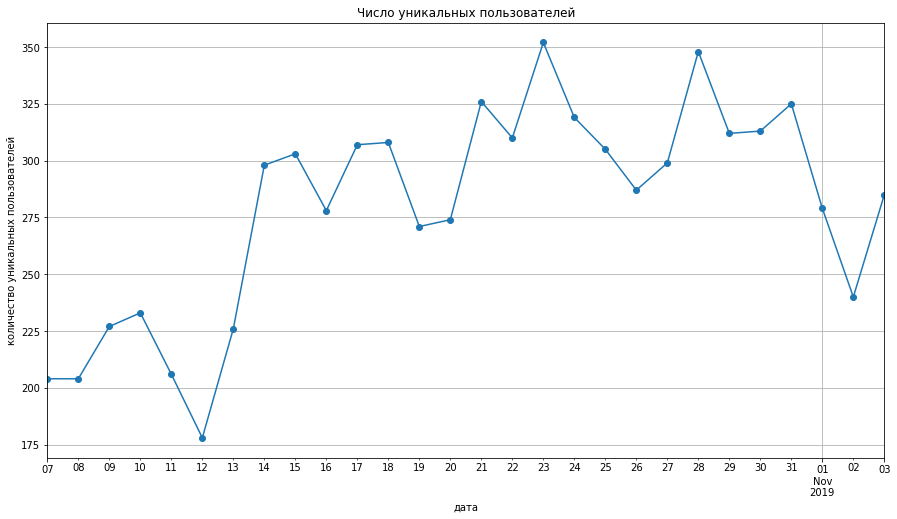

In [41]:
DAU.plot(figsize=(15, 8), grid=True, marker='o', legend=False)
plt.title('Число уникальных пользователей')
plt.xlabel('дата')
plt.ylabel('количество уникальных пользователей')

plt.show()

Среднее число уникальных пользователей в день(DAU) составляет 279 уникальных пользователей.

Минимальное значение DAU (178 пользователей) зафиксировано 12.10.2019, затем отмечается резкий рост, растущий тренднаблюдаетася до 31.10.2019, после идёт резкий спад.

<a id='step292'><a/> 
### Коэффициент удержания клиентов
[Назад к оглавлению](#back)

Для расчёта **Retention rate** создадим переменную куда поместим список пользовательских сессий путем группировки основного датафрейма по столбцам, содержащим сведения о пользователях и сессия, с применением аггрегирующей функции `min` к столбцу, содержащем сведения о моменте совершения события, для определения начала сессии.

In [42]:
#формируем список
sessions = df.groupby(['user_id', 'session_id']).agg({'event_time': 'min'})
#приводим в читаемый вид
sessions = sessions.rename(columns={'event_time': 'session_start'}).reset_index()

In [43]:
# задаем максимальную дату привлечения
max_acquisition_date = dt.datetime(2019, 10, 21).date()
# задаем максимальный лайфтайм для графика
max_lifetime = 14 

# объединяем профили и сессий в одну переменную ограничевая максимальной датой привлечения
rr = profiles.query('first_session <= @max_acquisition_date').merge(sessions[['user_id', 'session_start']], on='user_id', how='left')
#устраняем конфликт типов данных для дальнейших расчётов
rr['first_session'] = rr['first_session'].astype('datetime64') 
#считаем лайфтам
rr['lifetime'] = (rr['session_start'] - rr['first_session']).dt.days 

#строии таблицу удержания
rr_grouped = rr.pivot_table(index='first_session',columns='lifetime',values='user_id',aggfunc='nunique') 

# вычисляем размеры когорт
cohort_sizes = rr.groupby('first_session').agg({'user_id': 'nunique'}).rename(columns={'user_id': 'cohort_size'})

# объединяем размеры когорт и таблицу удержания
rr_grouped = cohort_sizes.merge(rr_grouped, on='first_session', how='left').fillna(0)

# делим данные таблицы удержания на размеры когорт
rr_grouped = rr_grouped.div(rr_grouped['cohort_size'], axis=0)

# учитываем максимальный лайфтайм
rr_grouped = rr_grouped[['cohort_size'] + list(range(max_lifetime))]

Построим тепловую карту удержания пользователей

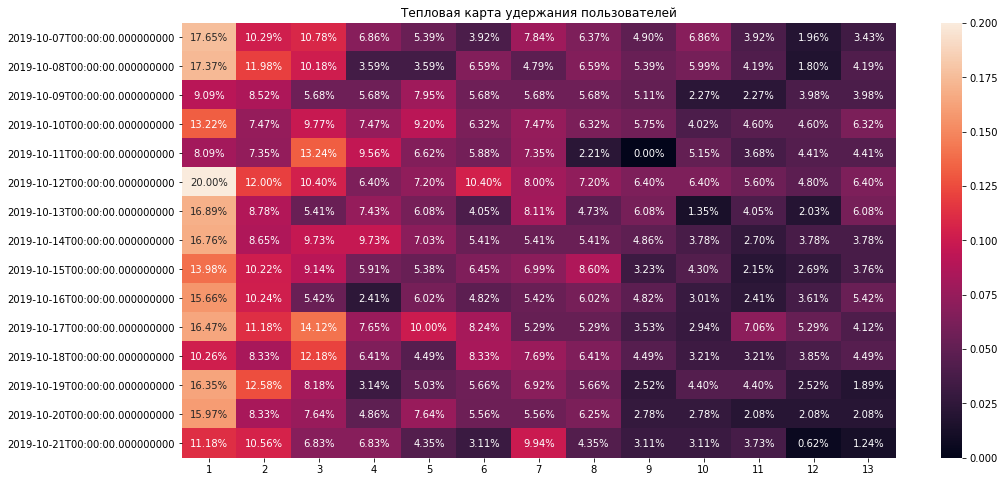

In [44]:
plt.figure(figsize=(16, 8))
sns.heatmap(rr_grouped.drop(columns=['cohort_size', 0]), annot=True, fmt='.2%')
plt.title('Тепловая карта удержания пользователей')
plt.ylabel('')
plt.show()

In [45]:
print('Средний retention rate 2 дня:',round(rr_grouped[1].mean()*100, 1))
print('Средний retention rate 14 дня:',round(rr_grouped[13].mean()*100, 1))

Средний retention rate 2 дня: 14.6
Средний retention rate 14 дня: 4.1


Для построения тепловой карты были выбраны пользователи для которых есть полные данные по активности за 14 дней, т.е. привлеченные с 7 по 21 октября 2019 года, 

На 2-й лайфтайм в мобильное приложение возвращается от 8 до 20% пользователей. Максимальный retention 2-го дня у когорты, привлеченной 12 октября.

На 14-й лайфтайм в мобильное приложение возвращается от 0,6 до 6% пользователей. Максимальный retention 14-го дня у когорты, привлеченной 12 октября.

<h2>Выводы:</h2>

- для анализа предоставлены действия за 28 дней в период c 2019-10-07 00:00:00 по 2019-11-03 23:58:13;
- график распределения событий по дате и времени позволил сделать вывод о том, что данные распределены равномерно;
- в логах содержится 73 079 событий, соверешенные 4 293 пользователями;
- в среднем на одного уникального пользователя приходится порядка 17 событий, медианное значение составляет 9 событий, на среднее значение сильно влияют выбросы (пользователи, с очень большим числом событий);
- самое распространенное действие - просмотр рекомендованных объявлений (более 54% от всех событий), рекомендованные объявления просматривает 65% пользователей, остальные действия совершают менее половины всех пользователей: на II месте - поиск (38% пользователей), на III - открытие карты (33% пользователей);
- выделили пользовательские сессии и выяснили, в среднем на одного пользователя приходится 2,7 сессий, при этом медианное значение — 2 сессии на пользователя, которое меньше среднего за счёт длинного хвоста редких, но очень высоких значений;
- визуализация количества сессий в разрезе пользователей показала, большинство пользователей имели по 1 сессии и больше в приложение не возвращались;
- среднее время проведенное в приложении составляет чуть более 8 с половиной минут;
- конверсия в целевое действие(contacts_show) составляла 22.9%;
- среднее число уникальных пользователей в день составляет 279 уникальных пользователей;
- средний retention rate 2-го дня составляет 14,6%, 14-го дня — 4,1%.

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step3'><a/> 
## Анализ влияния событий на совершение целевого события
[Назад к оглавлению](#back)

В целях анализа влияния иных событий на совершение целевого события выделим те из них, которые совершают пользователи вместе с целевым событием (события-компаньоны). Проанализируем, часто ли эти события бывают самостоятельными событиями пользователя или они составляют воронку. Проанализируем, за какое время до совершения целевого события совершаются вспомогательные события.

<a id='step31'><a/> 
### "События-компаньоны"
    
[Назад к оглавлению](#back)

Для выделения таких событий найдём те, которые совершают пользователи чаще всего вместе с целевым событием: сделаем срез основного датафрейма по списку сессий с целевым действием и посчитаем события.

In [46]:
# определим сессии, в которых совершено целевое событие
target_sessions_list = df.groupby('session_id').agg({'target_action': 'max'})
#создаем список сессий с целевым действием
target_sessions_list = target_sessions_list.query('target_action == True').index.to_list()

# делаем срез по списку сессий с целевым действием и считаем события
df.query('session_id in @target_sessions_list')['event_name'].value_counts()

tips_show        6685
contacts_show    4381
photos_show      1267
search            817
advert_open       672
contacts_call     538
map               455
favorites_add     212
tips_click        176
Name: event_name, dtype: int64

Как видим вместе с целевым дейтвием `contacts_show` рядом идут `tips_show`, `photos_show`, `search`,` advert_open`, `contacts_call` и `map`.

При этом принем во внимание, что `tips_show` является событием, на которое пользователь не оказывает влияние, в связи с чем его и событие `tips_click`, являющееся его продолжением не будем рассматривать в качестве "компаньона". 

Аналогично поступим и для "родственных" событий `contacts_call` и `contacts_show`.

Исходя из вышесказанного определим следующие "события-компаньоны": `photos_show`,`search`, `advert_open`, `map`.

<a id='step32'><a/> 
### Воронка событий
[Назад к оглавлению](#back)

На данном этапе выясним составляют ли "события-компаньоны" воронку, которая заканчивается целевым событием.

Для получения списков первых и всех событий и их частотности для пользователей, совершивших вспомогательные события, определим функцию `events_counts`, которая принимает событие, фильтрует пользователей, совершавших событие, возвращает лидиров первых событий и лидеров всех событий этих пользователей.

In [47]:
def events_counts(event):
    # фильтруем совершавших событие пользователей
    event_users = df.loc[df['event_name'] == event, 'user_id'].unique()
    # первые события сессий
    print(df.query('user_id in @event_users').groupby('session_id').agg({'event_name': 'first'})['event_name'].value_counts())
    # все события
    print(df.query('user_id in @event_users')['event_name'].value_counts())

Применим функцию для получения событий пользователей, совершивших "события-компаньоны".

In [48]:
# циклом передадим функции список событий
for event in ['photos_show', 'search', 'advert_open', 'map']:
    print(
        'Списки событий пользователей,\nсовершавших событие',
        event,
        '\n'
    )
    events_counts(event)
    print()

Списки событий пользователей,
совершавших событие photos_show 

photos_show      1950
search           1242
contacts_show     277
advert_open       112
favorites_add      90
tips_show          18
map                 6
tips_click          2
Name: event_name, dtype: int64
photos_show      9372
search           2820
contacts_show    1085
favorites_add     672
advert_open       406
contacts_call     401
tips_show         231
map                37
tips_click          8
Name: event_name, dtype: int64

Списки событий пользователей,
совершавших событие search 

search           2616
tips_show        1027
photos_show       823
map               342
advert_open       248
contacts_show     226
favorites_add      74
tips_click          9
Name: event_name, dtype: int64
tips_show        13280
search            6766
photos_show       5547
advert_open       3247
contacts_show     1584
map               1515
favorites_add      852
contacts_call      264
tips_click         152
Name: event_name, dtype: i

<h2>Выводы:</h2>

Определили, что вместе с целевым событием совершаются следующие "события-компаньоны": `photos_show`,`search`, `advert_open`, `map`.

Указанные выше события формируют 3 воронки событий (в скобках отмечено необязательное событие):

* photos_show → search → (advert_open) → contacts_show
* search → photos_show → (advert_open) → contacts_show
* map → advert_open → (photos_show) → contacts_show


<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step4'><a/> 
## Сегментация пользователей
[Назад к оглавлению](#back)

<a id='step43'><a/> 
### Определение метрик для сегментации
[Назад к оглавлению](#back)

В целях успешного разделения пользователей на группы определим набор метрик, которые позволят нам это сделать и создадим датафрейм куда поместим эти признаки.

Предлагается выделить следуюшие метрики:
* количество совершенных целевых действий;
* количество пользовательских сессий;
* количество времени, проведенное в приложении;
* среднее время сессии;
* атрибут совершения действия "поиск", как признак вовлеченности;
* признак установки приложения из неизвестного нам источника.

В переменную `users_group` поместим выделенные признаки в разрезе пользователей.

In [49]:
#сформируем переменную путем объединения списка пользователей по признаку совершения целевого действия и 
#количеством соверщенных целевых действий
users_group = target_action.merge(df.query('event_name == "contacts_show"').groupby('user_id', as_index=False).agg({'event_name':'count'}).rename(columns={'event_name':'target_count'}), on='user_id', how='left')
#заполним пропуски нулями
users_group['target_count'] = users_group['target_count'].fillna(0)
#добавим количество сессий
users_group = users_group.merge(df.groupby('user_id').agg({'session_id':'nunique'}).reset_index().rename(columns={'session_id':'session_count'}), on='user_id', how='left')
#добавим суммарное время сессий - время в приложении
users_group = users_group.merge(df.groupby(['user_id', 'session_id']).agg({'session_time':'min'}).reset_index().groupby('user_id').agg({'session_time':'sum'}).reset_index().rename(columns={'session_time':'in_app_time_sec'}), on='user_id', how='left')
#переведем общее время в секунды
users_group['in_app_time_sec'] = users_group['in_app_time_sec'].dt.total_seconds()
#посчитаем среднее время сессии
users_group['average_time_sec'] = round(users_group['in_app_time_sec']/users_group['session_count'],0)
#добавим "поиск", как признак вовлеченности 
users_group['search'] = df['event_name'] == 'search'
#добавим признак установки не из известных нам источников
users_group['other_source'] = df['source'] == 'other'
#выведем на экран
users_group.sample(5)

,user_id,target_action,target_count,session_count,in_app_time_sec,average_time_sec,search,other_source
4120,f60a4cd4-f82c-4897-9804-3b7b130b15ac,True,1.0,2,438.0,219.0,False,False
386,146c6d31-d314-4704-acac-b06c82dd13cd,True,2.0,2,734.0,367.0,False,True
3222,c12b870e-828e-40a4-b39a-2f4f92cb4afb,False,0.0,1,43.0,43.0,False,False
807,2d3aec1e-a800-4e81-a6af-7ace610aa8b1,True,2.0,4,4.0,1.0,True,False
2614,9c03f511-24e3-453d-8b2a-6ef5561d64d9,False,0.0,1,688.0,688.0,False,False


<a id='step44'><a/> 
### Матрица корреляции выбранных метрик для сегментации
[Назад к оглавлению](#back)

Визуализируем матрицу корреляций выбранных метрик, полученную методом `corr`, с помощью библиотеки `seaborn`.

<AxesSubplot:title={'center':'Тепловая карта для матрицы корреляций'}>

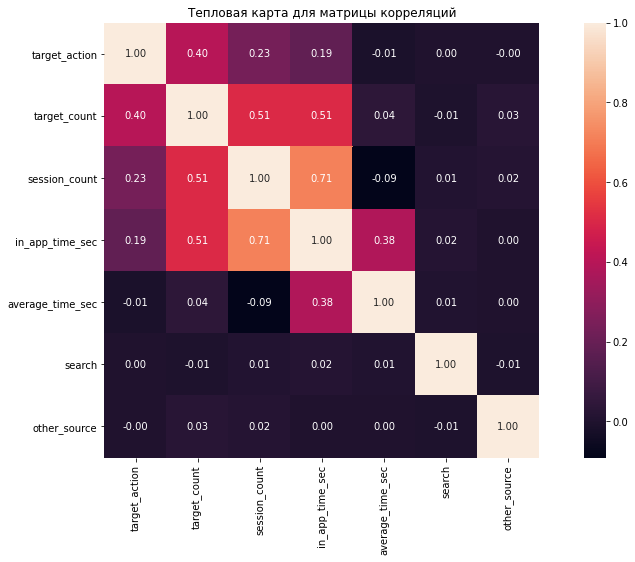

In [50]:
plt.figure(figsize=(16, 8))
plt.title('Тепловая карта для матрицы корреляций')
sns.heatmap(users_group.corr(), annot=True, fmt='.2f',square=True)

Из полученной тепловой карты можно сделать вывод:
* есть высокая зависимость (0,71) между количеством сессий и временем проведенным в приложение(наибольшая положительная корреляция);
* есть средние зависимости (0,51) между количеством сессий/количеством проведенного времени в приложениии и количеством совершенных целевых действий, что вполне объясними, чем больше пользователь использует приложение, тем выше шанс соврешения покупки через него;
* есть слабая засимость (0,4) между пользователями совершившими целевое действие и их количеством, что говорит о том, что соврешивший однажды целевое действие с большей вероятностью последующем его совершит повторно.
* есть слабая связь (0,23) между пользователями совершившими целевое действие и количеством сессий, что логично, т.к. люди, использующие приложение более одного раза, делают это с определенной целью с большей вероятностью;
* интресно также отметить, что существуют наибольшая отрицательная связь, хоть и очень слабая (-0,09) между количеством и средним временем сессии, скорее всего этого говорит о том, что с каждым разом пользователю проще пользоваться приложением, т.к. он его лучше узнает.

<a id='step45'><a/> 
### Сегментация и первые выводы
[Назад к оглавлению](#back)

В целях сегментации пользователей по выбранным метрикам произведем иерархическую кластеризацию пользователей с привлечением библиотек `sklearn` и `scipy`.

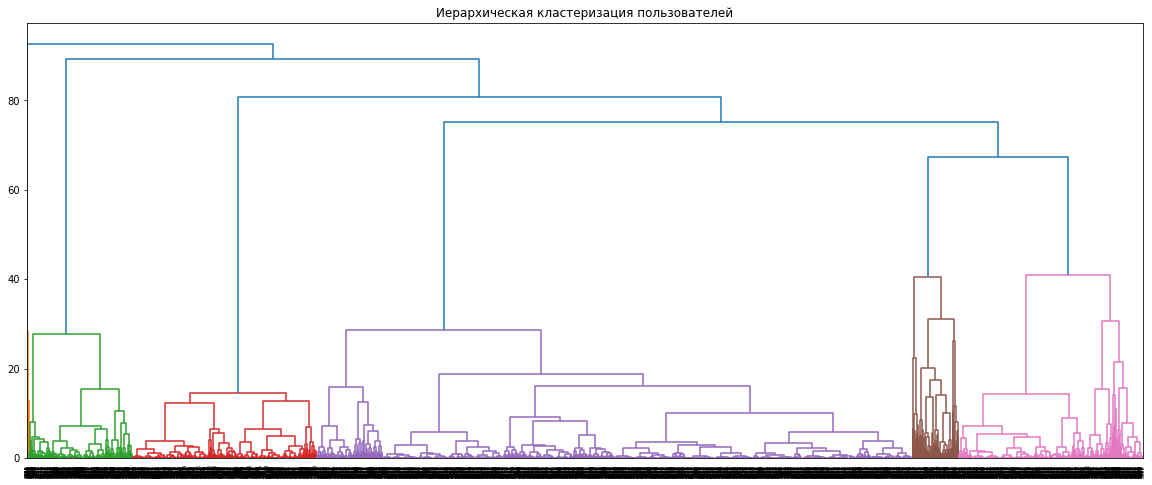

In [51]:
# в целях искоючения подглядования помимимо столбца с индификаторами пользователя также столбец с признаком 
#соверешения целевого действия
X = users_group.drop(['user_id', 'target_action'], axis=1)

sc = StandardScaler()
X_sc = sc.fit_transform(X)

linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(20, 8))  
dendrogram(linked, orientation='top')
plt.title('Иерархическая кластеризация пользователей')
plt.show();

Исходя из полученной дендграммы оптимальным будет выделение 5 групп пользователей.

Кластеризацию проведем путем применения метода k-средних из библиотеки `sklearn`.

In [52]:
#обучим модель
km = KMeans(n_clusters=5, random_state = 0)
labels = km.fit_predict(X_sc)

#поместим в датафрейм
users_group['cluster'] = labels
users_group.head()

,user_id,target_action,target_count,session_count,in_app_time_sec,average_time_sec,search,other_source,cluster
0,0001b1d5-b74a-4cbf-aeb0-7df5947bf349,False,0.0,4,2760.0,690.0,False,True,3
1,00157779-810c-4498-9e05-a1e9e3cedf93,True,11.0,9,7671.0,852.0,False,True,0
2,00463033-5717-4bf1-91b4-09183923b9df,False,0.0,1,1483.0,1483.0,False,True,3
3,004690c3-5a84-4bb7-a8af-e0c8f8fca64e,False,0.0,10,2012.0,201.0,False,True,3
4,00551e79-152e-4441-9cf7-565d7eb04090,True,3.0,3,560.0,187.0,False,True,3


<AxesSubplot:title={'center':'Распределение по кластерам'}, ylabel='cluster'>

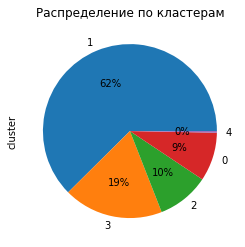

In [53]:
users_group['cluster'].value_counts().plot(kind='pie', y='cluster', autopct='%1.0f%%',title='Распределение по кластерам')

Определим средние значения выбранных метрик в рамках проведенной кластеризации.

In [54]:
clusters = users_group.groupby('cluster').mean().reset_index()
#добавим информацию о ёмкости кластера
clusters = clusters.merge(users_group.groupby('cluster').agg({'user_id':'count'}).reset_index().rename(columns={'user_id':'user_amount'}), on='cluster', how='left')
#для удобства переведем временные показатели в минуты и округлим до целового в большую сторону
clusters['average_time_sec'] = np.ceil(clusters['average_time_sec'] / 60)
clusters['in_app_time_sec'] = np.ceil(clusters['in_app_time_sec'] / 60)
#отразим это изменив наименования столбцов
clusters = clusters.rename(columns={'in_app_time_sec':'in_app_time_min', 'average_time_sec':'average_time_min'})

In [55]:
clusters

,cluster,target_action,target_count,session_count,in_app_time_min,average_time_min,search,other_source,user_amount
0,0,0.354756,2.822622,6.311054,95.0,31.0,0.025707,0.138817,389
1,1,0.211194,0.593657,2.251119,15.0,8.0,0.000000,0.000000,2680
2,2,0.221154,0.778846,2.670673,22.0,10.0,1.000000,0.211538,416
3,3,0.216352,0.698113,2.285535,16.0,9.0,0.000000,1.000000,795
4,4,1.000000,62.538462,45.384615,446.0,11.0,0.076923,0.384615,13


<h4>Первые выводы:</h4>

Проведенная кластеризация выделила 5 групп пользователей:
- 1(кластер "0") - в группу входит 389 человек, что составляет порядка 9% от общего количество изучаемых пользователей, главной отличительной чертой этой группы является наибольшее среднее время сессии - около 31 минуты, при этом пользователи данной в среднем совершают почти 3 целывых действия, а конверсия в это составляет 35%, что занимает вторую строчку общего рейтинга, также 2-е место принадлежит этой группе и по количеству сессий, чуть более 6, и общему времени в приложении - 95 минут;
- 2(кластер "1") - самая мнгочисленная группа, в нёё входит 2 680 пользователей, что составляет 62%, её характеризует наименьшее количество проведенного времени в приложении, соотвественно, и общего времени и количество сессий, отличительной чертой является, что пользователи не используют поиск, а также на 100% привлеченые путем google/yandex, по прочим показателем она находиться на худших позициях;
- 3(кластер "2") - группа крепких середнячков куда входит 10% пользователей (416 человек), отличительной чертой является то, что это пльзователи, которые целенаправленно пришли в приложения (100% используют поиск), остальное признаки группы находяться на третьем месте: можно сказать, что это люди, которые знают зачем пришли, однако не найдя это продолжают заходить в приложение, и вслучае успешного поиска совершают покупку, т.к. количество совершенных действий в ней стримиться к 1.
- 4(кластер "3") - группа на 100% пришедшая из неизвестных источников, а также неипользующая поиск в принципе, составляет 19% пользователей(795 человек), по остальным признаком находиться ненамного ниже группы №3, из чего можно высказать предположение, что это пользователи, которые пришли по рекомендации знакомых, заинтересованы в приложении, однако, не освоили принципы работы, также, возможно, если в приложение есть возможность делиться ссылками на объявления, они перешли по ним от других пользователей;
- 5(кластер "4) - "группа 100% успеха", самая немногочисленная, состоящая из 13 человек, эти пользователи пользуються приложением чаще всего: порядка 45-и 11-х минутных сессий и 62 целевых действия на одного человека, казлось бы мечта, но нет - они почти не пользуются поиском, следовательно, скорее всего это люди, одержимые импульсивными покупками, которые шерстят приложение в поисках счастья - есть большая вероятность, что рекламные объявления на них действуют лучше всего.

<a id='step5'><a/> 
## Ответы на запрос заказчика
[Назад к оглавлению](#back)

Заказчиком сформулированы следующие вопросы:
* Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
* Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
* Как различается время между распространенными событиями пользователей из разных групп?

<a id='step51'><a/> 
### Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?
[Назад к оглавлению](#back)

В целях ответа на данный вопросы совершим ряд манипуляций для расчёта RR в разрезе недель, а ввиду многочисленности выбранных групп определим функцию, которая позволит нам сократиьт время, необходимое для рассчётов.

In [56]:
df['event_week'] = df['event_time'].dt.isocalendar().week
df['event_week'] = df['event_week'].astype('int64')

In [57]:
df = df.merge(df.groupby(['user_id'])['event_date'].min().reset_index().rename(columns={'event_date':'first_activity_date'}), on='user_id', how='left')


In [58]:
df['first_activity_date'] = pd.to_datetime(df['first_activity_date'])
df['first_activity_week'] = df['first_activity_date'].dt.isocalendar().week
df['first_activity_week'] = df['first_activity_week'].astype('int64')

In [59]:
df['cohort_lifetime'] = df['event_week'] - df['first_activity_week']

In [60]:
df = df.merge(users_group[['user_id','cluster']], on='user_id', how='left')

Определим функцию в которую передав номер кластера получим `retenrion rate` требуемой группы, а также средний показатель второй недели с общей визуализацией.

In [61]:
def rr_for_cluster(cluster):
    print('Тепловая карта retention rate для группы №', cluster+1)
    df_cluster = df[df['cluster'] == cluster]
    cohorts_cluster = df_cluster.groupby(['first_activity_week', 'cohort_lifetime']).agg({'user_id': 'nunique'}).reset_index()

    cohorts_cluster_initial = cohorts_cluster[cohorts_cluster['cohort_lifetime'] == 0][['first_activity_week', 'user_id']]
    cohorts_cluster_initial = cohorts_cluster_initial.rename(columns={'user_id': 'cohort_size'})

    cohorts_cluster = cohorts_cluster.merge(cohorts_cluster_initial, on='first_activity_week', how='left')
    cohorts_cluster['retention'] = cohorts_cluster['user_id'] / cohorts_cluster['cohort_size']
    cohorts_cluster_pivot = cohorts_cluster.pivot_table(index='first_activity_week', columns='cohort_lifetime', values='retention', aggfunc='sum')
    print('Средний retention rate 2-й недели:',round(cohorts_cluster_pivot[1].mean()*100, 1))
    print('Средний retention rate 4-й недели:',round(cohorts_cluster_pivot[3].mean()*100, 1))
    sns.set(style='white')
    plt.figure(figsize=(8,6))
    plt.title('Retention rate')
    sns.heatmap(cohorts_cluster_pivot, annot=True, fmt='.1%', linewidth=1, linecolor='gray')
    plt.show()

Тепловая карта retention rate для группы № 1
Средний retention rate 2-й недели: 42.9
Средний retention rate 4-й недели: 23.5


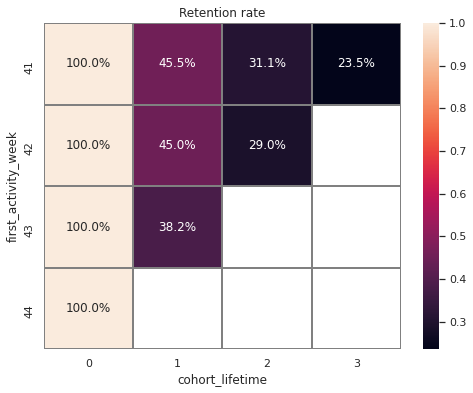

Тепловая карта retention rate для группы № 2
Средний retention rate 2-й недели: 21.1
Средний retention rate 4-й недели: 7.2


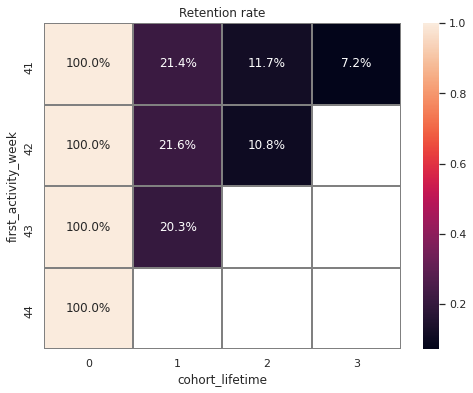

Тепловая карта retention rate для группы № 3
Средний retention rate 2-й недели: 24.3
Средний retention rate 4-й недели: 8.3


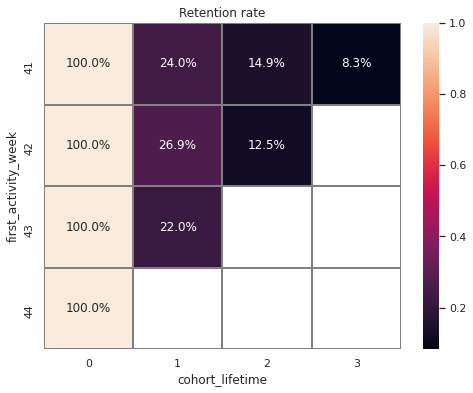

Тепловая карта retention rate для группы № 4
Средний retention rate 2-й недели: 18.8
Средний retention rate 4-й недели: 10.8


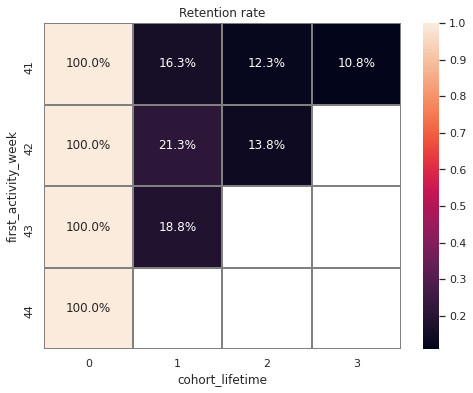

Тепловая карта retention rate для группы № 5
Средний retention rate 2-й недели: 81.9
Средний retention rate 4-й недели: 88.9


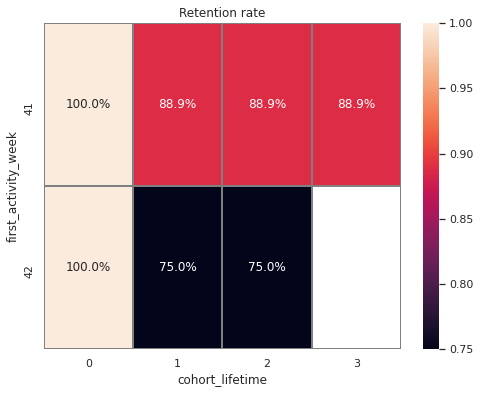

In [62]:
for cn in sorted(df['cluster'].unique()):
    rr_for_cluster(cn)

Средний `retention rate`, для II и IV недели, в разрезе групп выглядит следющим образом:
* 1 - 42,9 | 23,5 %
* 2 - 21,1 |  7,2 %
* 3 - 24,3 |  8,3 %
* 4 - 18,8 | 10,8 %
* 5 - 81,9 | 88,9 %.

Хорошие показатели по обоим рассматриваемым неделял показывает группа №1, напомним, что они обладают лучшим показателем по средней длине сессий, при этом совершают в среднем почти 3 целевых действия. По всей видимости это и есть "костяк" пользователей мобильного приложения.

Вторая группа имеет наименьший retention rate IV недели - 7,2 %, напомним, что она самая мнгоночисленная и состоит на 100% пришла по источникам google/yandex, по всей видмисоти - это "залетные птички", которые поддались на рекламу, установили приложение, немного попользовались, сочли его неитересным и перестали использовать, целевое действие в этой группе совершило наименьшее количество человек.

Третья группа показывает средние показатели (особенность - 100% поиск) что подтверждает тезис о том, что это они пришли за чем-то конретным и используют приложение по назначению.

Четвертая группа (100% из неизвестного источника) имеет худший показатель второй недели, что возможно подтвержает тезис о том, что они пришли по наводке от друзей/знакомых, при этом показатели IV недели находяться на 3-м месте, что возможно сведетельствует о возможности работы с данным сегментом.

Ожидаемо, самый высокий показатель retention rate второй недели в группе №5, однако, следует обратить внимание, что в данную группу не вошли пользователи 43 и 44 недели использования приложения, RR 4-й недели ещё больше высок, но он сформирован пользователся только кагорты недели 41. Следует провести дополнительное расследование почему в эту группу не попал не один человек из кагорт 43/44. Возможно эта группа тестировщиков приложения.



<a id='step52'><a/> 
### Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?
[Назад к оглавлению](#back)

In [63]:
clusters[['cluster','target_action']].sort_values('target_action', ascending=False)

,cluster,target_action
4,4,1.000000
0,0,0.354756
2,2,0.221154
3,3,0.216352
1,1,0.211194


Пользователи 5-й группы в среднем совершают наибольшее количество целевых действий, несмотря на их малочисленность, далее следуют пользователи 1 группы, которые по нашему виденью составляют целевую группу приложения.

Но посмотрим под ещё один углом на этот вопрос: каково соотношение целевых действий к количеству сессий.

In [64]:
clusters['target_count']/clusters['session_count']

0    0.447251
1    0.263716
2    0.291629
3    0.305449
4    1.377966
dtype: float64

Как видно из рассчёта почти каждая вторая сессия группы №1 знаканчивается целевым действием.

А для группы пять приходиться более 1-го целевого действия на сессию. Надо дополнительно исследовать причины такой активности: шопоголизм это либо группа тестировщиков, а может в целом аномалии, связанные с техническими ошибками логирования.

<a id='step53'><a/> 
### Как различается время между распространенными событиями пользователей из разных групп?
[Назад к оглавлению](#back)

Исходя из построенных выше построеных воронок, можно сделаь вывод, что значимыми событиями в цепочке использования приложения выступают следующие шаги:
* `search` → `photos_show` → `(advert_open)` → `contacts_show`
* `map` → `advert_open` → `(photos_show)` → `contacts_show`

Исходя из них можно сформировать наиболее распостраненные события, цепочка которых будет выглядеть следующим образом:
<div align='center'><b>search/map → photos_show/advert_open → contacts_show </b></div>

Пользователь ищёт нужную вещь либо просматривает карту с объявлениями, потом открывает карточку объявления либо просматривает фотографии, а позже совершает целевое действие.


Чтобы ответить на данный вопрос рассчитаем среднее время между шагом 1 и шагом 2 в разрезе групп.

In [65]:
#выделяем события относящиеся с первому шагу из основного датафрейма, учитывая признак соврешения целевого действия
first_step = df[df['target_action'] != 0 & df['event_name'].isin(['search', 'map'])][['cluster','session_id','event_name','event_time']]
#определяем первое событие в разрезе сессий
first_step = first_step.groupby(['cluster','session_id']).agg({'event_time':'first'}).reset_index().rename(columns={"event_time":"first_search"})
#выделяем второй шаг в разрезе сессий, попавший в первый шаг
next_step = df[df['session_id'].isin(first_step['session_id'].unique()) & df['event_name'].isin(['photos_show', 'advert_open'])][['cluster','session_id','event_name','event_time']]
#определяем последнее время второго действия в шаге
next_step = next_step.groupby(['cluster','session_id']).agg({'event_time':'last'}).reset_index().rename(columns={"event_time":"last_next_step"})
#формируем воронку
event_funnel = first_step.merge(next_step, on=['cluster','session_id'], how='inner')

In [66]:
#вычесляем время шага
event_funnel['step_time'] = event_funnel['last_next_step'] - event_funnel['first_search']
event_funnel['step_time'] = event_funnel['step_time'].dt.total_seconds()
#откинем значения шага меньше 0
event_funnel = event_funnel[event_funnel.step_time > 0]
#выводим на экран пример
event_funnel.sample()

,cluster,session_id,first_search,last_next_step,step_time
293,1,10473,2019-10-23 16:54:46,2019-10-23 16:58:02,196.0


Циклом выводим среднее время в секундах между значимыми событиями

In [67]:
for i in sorted(event_funnel['cluster'].unique()):
    print('Среднее время между значимыми шагами в группе', i+1, 'составляет:',
          round(event_funnel[event_funnel['cluster'] == i]['step_time'].mean(),0), 'секунд(ы)')
    print()


Среднее время между значимыми шагами в группе 1 составляет: 1000.0 секунд(ы)

Среднее время между значимыми шагами в группе 2 составляет: 442.0 секунд(ы)

Среднее время между значимыми шагами в группе 3 составляет: 676.0 секунд(ы)

Среднее время между значимыми шагами в группе 4 составляет: 444.0 секунд(ы)

Среднее время между значимыми шагами в группе 5 составляет: 957.0 секунд(ы)



Можно выделить три группы в данном контекте: 
* I - до 10 минут(группы № 2, 4)
* II - около 10 минут (группа №3)
* III - более 10 минут (группы № 1, 5)

<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step6'><a/> 
## Проверка гипотиз
[Назад к оглавлению](#back)

В целях сегментации пользователей разделим пользователей в разрезе проведенного времени в приложении.

<a id='step61'><a/> 
### Конверсия в просмотры контактов пользователей пришедших из источников google и yandex
[Назад к оглавлению](#back)

Проверим статистическую значимость различия в конверсии посетителями из `yandex` и `google` в целевое действие (`show_contacts`).



Сформулируем гипотезы:<br>
H0: <i><u>Нет статистически значимого различия в конверсии в show_contacts между посетителями из разных источников.</i></u><br>
H1: <i><u>Есть статистически значимое различие в конверсии в show_contacts между посетителями из разных источников.</i></u>


<i>Определим критический уровень статистической значимости alpha в 5%.</i>

In [68]:
alpha = 0.05

In [69]:
# формируем группы
users_from_yandex = df[df['source'] == 'yandex']
users_from_yandex_target_action = users_from_yandex.groupby('target_action', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'uniq_users_from_yandex'})

users_from_google = df[df['source'] == 'google']
users_from_google_target_action = users_from_google.groupby('target_action', as_index=False).agg({'user_id': 'nunique'}).rename(columns={'user_id': 'uniq_users_from_google'})
# считаем успехи
successes = pd.concat([users_from_yandex_target_action[users_from_yandex_target_action['target_action'] == True]['uniq_users_from_yandex'],\
                           users_from_google_target_action[users_from_google_target_action['target_action'] == True]['uniq_users_from_google']], axis=0)
trials = [users_from_yandex['user_id'].unique().shape[0], users_from_google['user_id'].unique().shape[0]]


stat, p_value = proportions_ztest(successes, trials)

print('{0:0.5f}'.format(p_value))
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу: между долями есть значимая разница")
else:
    print("Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными") 

0.82443
Не получилось отвергнуть нулевую гипотезу, нет оснований считать доли разными


<h4>Вывод:</h4>

Статистических различий конверсии в целевое действие (`show_contacts`) между пользователями, пришедшими из источников `google` и `yandex` нет.

<a id='step62'><a/> 
### Конверсия в просмотры контактов пользователей, которые совершают действия tips_show и tips_click, и тех, что совершают только действие tips_show
[Назад к оглавлению](#back)

Проверим статистическую значимость различия в конверсии в просмотры контактов пользователей, которые совершают действия `tips_show` и `tips_click`, и тех, что совершают только действие `tips_show`.


Сформулируем гипотезы:<br>
H0: <i><u>Конверсия в просмотры контактов пользователей, которые совершают действия tips_show и tips_click, и тех, которые совершают только действие tips_show одинакова</i></u><br>
H1: <i><u>Конверсия в просмотры контактов пользователей, которые совершают действия tips_show и tips_click, и тех, которые совершают только действие tips_show различается</i></u>


<i>Определим критический уровень статистической значимости alpha в 5%.</i>

In [70]:
# формируем группы
group_a_users = pd.Series(df.query('event_name == "tips_click"')['user_id'].unique())
group_b_users = pd.Series(df.query('event_name == "tips_show"')['user_id'].unique())


# считаем сконвертировавшихся пользователей в группах
group_a_conv = target_action.query('user_id in @group_a_users')['target_action'].sum()
group_b_conv = target_action.query('user_id in @group_b_users')['target_action'].sum()

print(
    'Конверсия группы A:',
    round(group_a_conv / len(group_a_users), 2),
    '\nКонверсия группы B:',
    round(group_b_conv / len(group_b_users), 2))

Конверсия группы A: 0.31 
Конверсия группы B: 0.18


In [71]:
p1 = group_a_conv / len(group_a_users)
p2 = group_b_conv / len(group_b_users)
p_combined = (group_a_conv + group_b_conv) / (len(group_a_users) + len(group_b_users))
# разница пропорций в датасетах
difference = p1 - p2
# считаем статистику
z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1 / len(group_a_users) + 1 / len(group_b_users)))
# задаем стандартное нормальное распределение
from scipy import stats as st
distr = st.norm(0, 1)

# получаем p_value
p_value = (1 - distr.cdf(abs(z_value))) * 2

print('p-value', p_value)
if p_value < alpha:
    print('Отвергаем нулевую гипотезу: конверсия различается в зависимости от событий.\n')
else:
    print('Не удалось отвергнуть нулевую гипотезу, конверсия одинакова вне зависимости от событий.\n')

p-value 6.829050147594273e-08
Отвергаем нулевую гипотезу: конверсия различается в зависимости от событий.



<h4>Вывод:</h4>

Статистический тест показал значимое различие в конверсии между пользователями группы A и группы B.

Таким образом, принимаем альтернативную гипотезу: конверсия в просмотры контактов пользователей, которые совершают действия `tips_show` и `tips_click`, и тех, которые совершают только действие `tips_show` различается.



<hr align="center" width="80%" size="3" color="#0000dd" />

<a id='step7'><a/> 
## Общие выводы
[Назад к оглавлению](#back)

На этапе предобработки данных был исправлен стиль заголовков, были преобразованы типы данных, а также исходные данные были объединены в один датафрейм. 

Были обнаружены аномалии в данных — дубликаты, возникающие при округлении времени события до 1 секунды. Предположив, что это технические огрехи записи логов было принято решение такие дубликаты удалить, это составило 1,4% событий.

На этапе исследовательского анализа данных были полученные следующие сведения:
- для анализа предоставлены действия за 28 дней в период c 2019-10-07 00:00:00 по 2019-11-03 23:58:13;
- график распределения событий по дате и времени позволил сделать вывод о том, что данные распределены равномерно;
- в логах содержится 73 079 событий, соверешенные 4 293 пользователями;
- в среднем на одного уникального пользователя приходится порядка 17 событий, медианное значение составляет 9 событий, на среднее значение сильно влияют выбросы (пользователи, с очень большим числом событий);
- самое распространенное действие - просмотр рекомендованных объявлений (более 54% от всех событий), рекомендованные объявления просматривает 65% пользователей, остальные действия совершают менее половины всех пользователей: на II месте - поиск (38% пользователей), на III - открытие карты (33% пользователей);
- выделили пользовательские сессии и выяснили, в среднем на одного пользователя приходится 2,7 сессий, при этом медианное значение — 2 сессии на пользователя, которое меньше среднего за счёт длинного хвоста редких, но очень высоких значений;
- визуализация количества сессий в разрезе пользователей показала, большинство пользователей имели по 1 сессии и больше в приложение не возвращались;
- среднее время проведенное в приложении составляет чуть более 8 с половиной минут;
- конверсия в целевое действие(contacts_show) составляла 22.9%;
- среднее число уникальных пользователей в день составляет 279 уникальных пользователей;
- средний retention rate 2-го дня составляет 14,6%, 14-го дня — 4,1%.

Анализ влияния событий на совершение целевого события показал, что вместе с целевым событием `contacts_show` совершаются "события-компаньоны": `photos_show`,`search`, `advert_open`, `map`.

Вспомогательные события составляют 3 частые воронки событий (в скобках отмечено необязательное событие):
<div align='center'>  photos_show → search → (advert_open) → contacts_show </div>
<div align='center'>  search → photos_show → (advert_open) → contacts_show </div>
<div align='center'>  map → advert_open → (photos_show) → contacts_show </div>

В целях разделения пользователей на группы был определён следующий набор метрик:
* количество совершенных целевых действий;
* количество пользовательских сессий;
* количество времени, проведенное в приложении;
* среднее время сессии;
* атрибут совершения действия "поиск", как признак вовлеченности;
* признак установки приложения из неизвестного нам источника.

Проведенная кластеризация выделила 5 групп пользователей:

* 1(кластер "0") - в группу входит 389 человек, что составляет порядка 9% от общего количество изучаемых пользователей, главной отличительной чертой этой группы является наибольшее среднее время сессии - около 31 минуты, при этом пользователи данной в среднем совершают почти 3 целывых действия, а конверсия в это составляет 35%, что занимает вторую строчку общего рейтинга, также 2-е место принадлежит этой группе и по количеству сессий, чуть более 6, и общему времени в приложении - 95 минут;
* 2(кластер "1") - самая мнгочисленная группа, в нёё входит 2 680 пользователей, что составляет 62%, её характеризует наименьшее количество проведенного времени в приложении, соотвественно, и общего времени и количество сессий, отличительной чертой является, что пользователи не используют поиск, а также на 100% привлеченые путем google/yandex, по прочим показателем она находиться на худших позициях;
* 3(кластер "2") - группа крепких середнячков куда входит 10% пользователей (416 человек), отличительной чертой является то, что это пльзователи, которые целенаправленно пришли в приложения (100% используют поиск), остальное признаки группы находяться на третьем месте: можно сказать, что это люди, которые знают зачем пришли, однако не найдя это продолжают заходить в приложение, и вслучае успешного поиска совершают покупку, т.к. количество совершенных действий в ней стримиться к 1.
* 4(кластер "3") - группа на 100% пришедшая из неизвестных источников, а также неипользующая поиск в принципе, составляет 19% пользователей(795 человек), по остальным признаком находиться ненамного ниже группы №3, из чего можно высказать предположение, что это пользователи, которые пришли по рекомендации знакомых, заинтересованы в приложении, однако, не освоили принципы работы, также, возможно, если в приложение есть возможность делиться ссылками на объявления, они перешли по ним от других пользователей;
* 5(кластер "4) - "группа 100% успеха", самая немногочисленная, состоящая из 13 человек, эти пользователи пользуються приложением чаще всего: порядка 45-и 11-х минутных сессий и 62 целевых действия на одного человека, казлось бы мечта, но нет - они почти не пользуются поиском, следовательно, скорее всего это люди, одержимые импульсивными покупками, которые шерстят приложение в поисках счастья - есть большая вероятность, что рекламные объявления на них действуют лучше всего.

Поиск ответов на вопросы исследования привел нас к следующим результатам:
1. Пользователи какой группы склонны часто возвращаться в мобильное приложение (Retention rate)?

    Средний retention rate, для II и IV недели, в разрезе выделеных групп выглядит следующим образом:

    1 - 42,9 | 23,5 % <br>
    2 - 21,1 |  7,2 % <br>
    3 - 24,3 |  8,3 % <br>
    4 - 18,8 | 10,8 % <br>
    5 - 81,9 | 88,9 % <br>

    Хорошие показатели по обоим рассматриваемым неделял показывает группа №1, напомним, что они обладают лучшим показателем по средней длине сессий, при этом совершают в среднем почти 3 целевых действия. По всей видимости это и есть "костяк" пользователей мобильного приложения.

    Вторая группа имеет наименьший retention rate IV недели - 7,2 %, напомним, что она самая мнгоночисленная и состоит на 100% пришла по источникам google/yandex, по всей видмисоти - это "залетные птички", которые поддались на рекламу, установили приложение, немного попользовались, сочли его неитересным и перестали использовать, целевое действие в этой группе совершило наименьшее количество человек.

    Третья группа показывает средние показатели (особенность - 100% поиск) что подтверждает тезис о том, что это они пришли за чем-то конретным и используют приложение по назначению.

    Четвертая группа (100% из неизвестного источника) имеет худший показатель второй недели, что возможно подтвержает тезис о том, что они пришли по наводке от друзей/знакомых, при этом показатели IV недели находяться на 3-м месте, что возможно сведетельствует о возможности работы с данным сегментом.

    Ожидаемо, самый высокий показатель retention rate второй недели в группе №5, однако, следует обратить внимание, что в данную группу не вошли пользователи 43 и 44 недели использования приложения, RR 4-й недели ещё больше высок, но он сформирован пользователся только кагорты недели 41. Следует провести дополнительное расследование почему в эту группу не попал не один человек из кагорт 43/44. Возможно эта группа тестировщиков приложения.
    
2. Пользователи какой группы часто делают целевое событие (конверсия в целевое действие)?

    Произведенные рассчёты показали почти каждая вторая сессия группы №1 знаканчивается целевым действием.А для группы пять приходиться более 1-го целевого действия на сессию. Надо дополнительно исследовать причины такой активности: шопоголизм это либо группа тестировщиков, а может в целом аномалии, связанные с техническими ошибками логирования.
    
3. Как различается время между распространенными событиями пользователей из разных групп?

    Анализ среднего времени между двумя шага, предшествующим целевому действию, показал, что можно выделенные группы сегментировать на три группы:

    I - до 10 минут(группы № 2, 4)<br>
    II - около 10 минут (группа №3)<br>
    III - более 10 минут (группы № 1, 5)<br>

Проверка гипотез с помощью статистического теста показала:

* Статистических различий конверсии в целевое действие (`show_contacts`) между пользователями, пришедшими из источников `google` и `yandex` нет.
* Конверсия в просмотры контактов пользователей, которые совершают действия `tips_show` и `tips_click`, и тех, которые совершают только действие `tips_show` различается.

<a id='step7'><a/> 
## Рекомендации
[Назад к оглавлению](#back)

Следует провести дополнительный анализ пользователей, попавших в пятую группу, в частности разобраться в чем причина повышенной активности.

Что касается взаимодейсвия с группами, то следует обратить особое внимание и провести дополнительное исследование в целях повышения времени удержания для групп 3 и 4, так как они являются потенциальными пользователями данного приложения.

Также следует обратить на пользователей самой многочисленной группы (№2), учитывая, что она полностью софрмированна из пользователей привлеченных из источников google/yandex возможно следует провести корректировку рекламных кампаний в целях уменьшения отскова привлекаемых пользователей. Следует рассмотрение внедрения опросника по интересам в процессе регистрации, в дальнейшем это позволит провести более широкий анализ и сегментировать этих пользователей на более низком уровне.

В свою очередь, в отсутвтсвии статистических различий конверсии в целевое действие между пользователями, пришедшими из источников google и yandex нет, надо посмотреть затраты в рамках этих канолов и скорректировать затраты.

Есть некоторая неразбериха в лога действий, часть из них имееют одинаковый смысл, следуют переработь систему логирования и настроить в соответвии с требованиями проводимых исследований, так следует унифицировать поисковые запросы, также следует внедрить систему позволяющую отлавливать пользователей из истоника other(переход по ссылки, установка с сайта, установка из маркета(вне рекламной интеграции) и прочее).

<hr align="center" width="80%" size="3" color="#0000dd" />